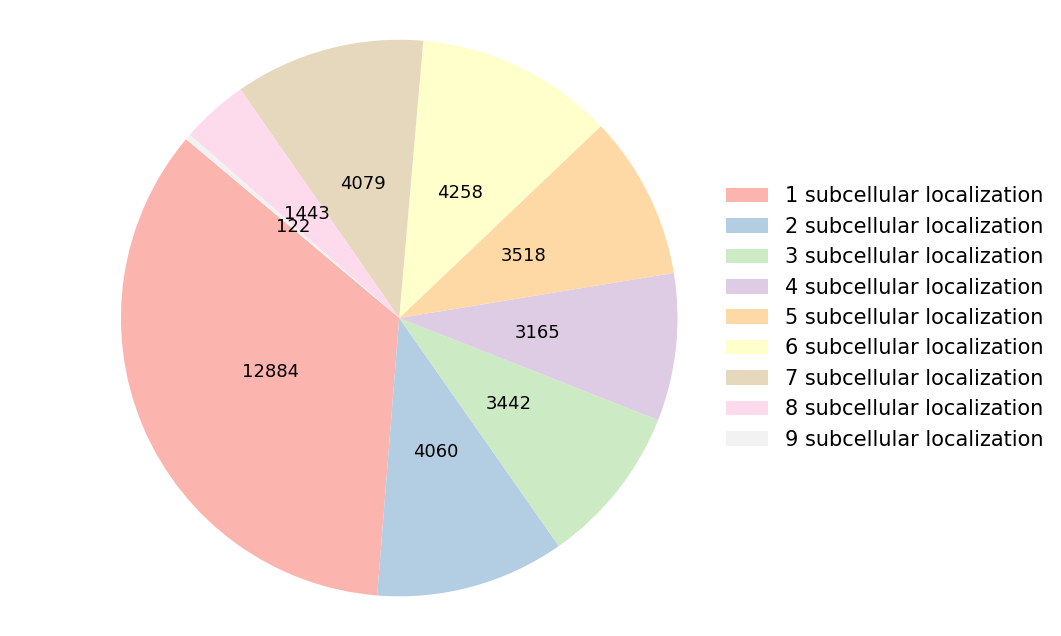

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Read data lines from the first file
file1 = "../dataset/training_validation_annotation.txt"
with open(file1, 'r') as f:
    lines1 = f.readlines()

# Read data lines from the second file
file2 = "../dataset/independent_annotation.txt"
with open(file2, 'r') as f:
    lines2 = f.readlines()

# Combine all data lines from both files
lines = lines1 + lines2

# Initialize a list to count the occurrences of each number of subcellular localizations
num_positions_counts = [0] * 9
for line in lines:
    # Split the line by '|' to get the subcellular localizations
    positions = line.strip().split('|')
    num_positions = len(positions)  # Get the number of subcellular localizations
    if 1 <= num_positions <= 9:
        num_positions_counts[num_positions - 1] += 1  # Increment the corresponding count

# Define labels for the pie chart
labels = [f"{i} subcellular localization" for i in range(1, 10)]
colors = plt.cm.Pastel1(range(9))  # Use pastel colors for the pie chart

plt.figure(figsize=(10, 8))  # Increase the width of the figure
wedges, texts, autotexts = plt.pie(
    num_positions_counts, labels=None, startangle=140, colors=colors, autopct='', 
    textprops={'color': "black", 'fontsize': 12}
)

# Add count labels to each wedge of the pie chart
for i, (autotext, count) in enumerate(zip(autotexts, num_positions_counts)):
    angle = wedges[i].theta2 - wedges[i].theta1
    x = 0.5 * np.cos(np.deg2rad(wedges[i].theta1 + 0.5 * angle))
    y = 0.5 * np.sin(np.deg2rad(wedges[i].theta1 + 0.5 * angle))
    plt.text(x, y, str(count), color='black', fontsize=13, ha='center', va='center')

# Place the legend on the right side of the chart and adjust the distance
plt.legend(labels, loc='center left', bbox_to_anchor=(0.9, 0.5), frameon=False, prop={'size': 15})

plt.axis('equal')  # Ensure the pie chart is circular

# Save the figure to a file with high resolution
plt.savefig("../dataset/number_of_positions_distribution.png", dpi=300, bbox_inches='tight')  # Use bbox_inches='tight' to ensure the legend is fully displayed

plt.show()  # Display the pie chart


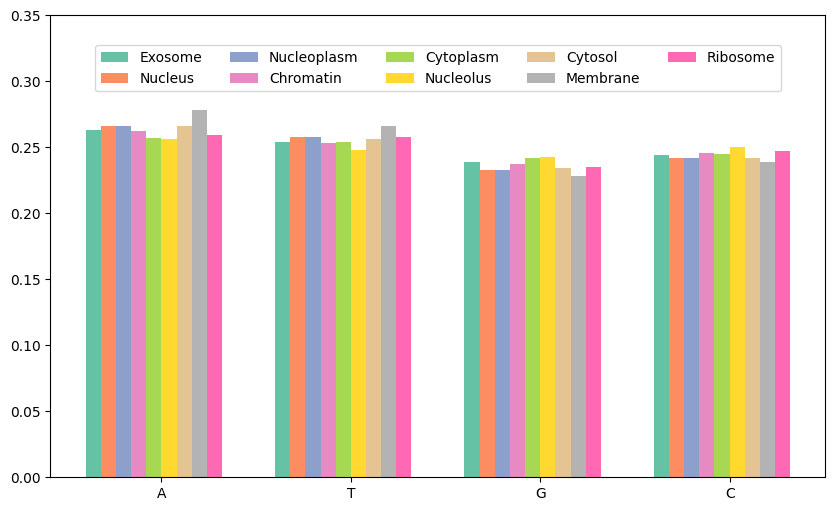

In [107]:
import matplotlib.pyplot as plt
import numpy as np


data = {
    'Exosome': [0.263, 0.254, 0.239, 0.244],  
    'Nucleus': [0.266, 0.258, 0.233, 0.242],
    'Nucleoplasm': [0.266, 0.258, 0.233, 0.242],
    'Chromatin': [0.262, 0.253, 0.237, 0.246],
    'Cytoplasm': [0.257, 0.254, 0.242, 0.245],
    'Nucleolus': [0.256, 0.248, 0.243, 0.250],
    'Cytosol': [0.266, 0.256, 0.234, 0.242],
    'Membrane': [0.278, 0.266, 0.228, 0.239],
    'Ribosome': [0.259, 0.258, 0.235, 0.247]
}

# List of bases
bases = ['A', 'T', 'G', 'C']

# List of colors
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3', '#ff69b4']

# Set the width of the bars
bar_width = 0.08

# Plot the bar chart
for i, (position, counts) in enumerate(data.items()):
    x = np.arange(len(bases)) + i * bar_width - bar_width * 4.5
    plt.bar(x, counts, color=colors[i], width=bar_width, label=position)

# Set x-axis ticks
plt.xticks(np.arange(len(bases)), bases)

# Add the legend and place it inside the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), prop={'size': 10}, ncol=5)

# Set the maximum value of the y-axis
plt.ylim(0, 0.35)

# Set the figure size
plt.gcf().set_size_inches(10, 6)

# Save the figure as a high-resolution image
plt.savefig('../dataset/subcellular_location_counts.png', dpi=300)

# Display the plot
plt.show()


In [6]:
from collections import defaultdict
from itertools import combinations


file1 = '../dataset/training_validation_annotation.txt'
file2 = '../dataset/independent_annotation.txt'

# Function to read file content and return it as a list of lines
def read_file(file):
    with open(file, 'r') as f:
        return f.readlines()

# Read content from both files
data1 = read_file(file1)
data2 = read_file(file2)

# Merge content from both files
data = data1 + data2

# Initialize dictionaries to count occurrences
location_count = defaultdict(int)
pair_count = defaultdict(int)

# Process each line in the data
for line in data:
    locations = line.strip().split('|')
    # Count occurrences of each individual location
    for location in locations:
        location_count[location] += 1
    # Count occurrences of each pair of locations
    for pair in combinations(locations, 2):
        pair_count[tuple(sorted(pair))] += 1

# Find all unique locations
all_locations = set(location_count.keys())

# Calculate total co-occurrence count for each pair of locations
total_pair_count = defaultdict(int)
for loc1 in all_locations:
    for loc2 in all_locations:
        if loc1 != loc2:
            pair = tuple(sorted((loc1, loc2)))
            total_pair_count[pair] += pair_count[pair]

# Output the results
print("Single location occurrence counts:")
for location, count in location_count.items():
    print(f"{location}: {count}")

print("\nCo-occurrence counts for each pair of locations:")
for pair, count in total_pair_count.items():
    print(f"{pair}: {count}")


Single location occurrence counts:
Exosome: 31448
Nucleus: 21439
Nucleoplasm: 14237
Chromatin: 14328
Cytosol: 16312
Ribosome: 8680
Cytoplasm: 4016
Nucleolus: 11124
Membrane: 6739

Co-occurrence counts for each pair of locations:
('Cytosol', 'Exosome'): 32432
('Cytosol', 'Membrane'): 11826
('Chromatin', 'Cytosol'): 21986
('Cytosol', 'Nucleus'): 25734
('Cytosol', 'Nucleolus'): 17432
('Cytoplasm', 'Cytosol'): 2342
('Cytosol', 'Nucleoplasm'): 22010
('Cytosol', 'Ribosome'): 12694
('Exosome', 'Membrane'): 13452
('Chromatin', 'Exosome'): 28574
('Exosome', 'Nucleus'): 35934
('Exosome', 'Nucleolus'): 22218
('Cytoplasm', 'Exosome'): 4020
('Exosome', 'Nucleoplasm'): 28402
('Exosome', 'Ribosome'): 17326
('Chromatin', 'Membrane'): 10386
('Membrane', 'Nucleus'): 11970
('Membrane', 'Nucleolus'): 8262
('Cytoplasm', 'Membrane'): 1090
('Membrane', 'Nucleoplasm'): 10502
('Membrane', 'Ribosome'): 4864
('Chromatin', 'Nucleus'): 23956
('Chromatin', 'Nucleolus'): 18614
('Chromatin', 'Cytoplasm'): 2012
('Chro

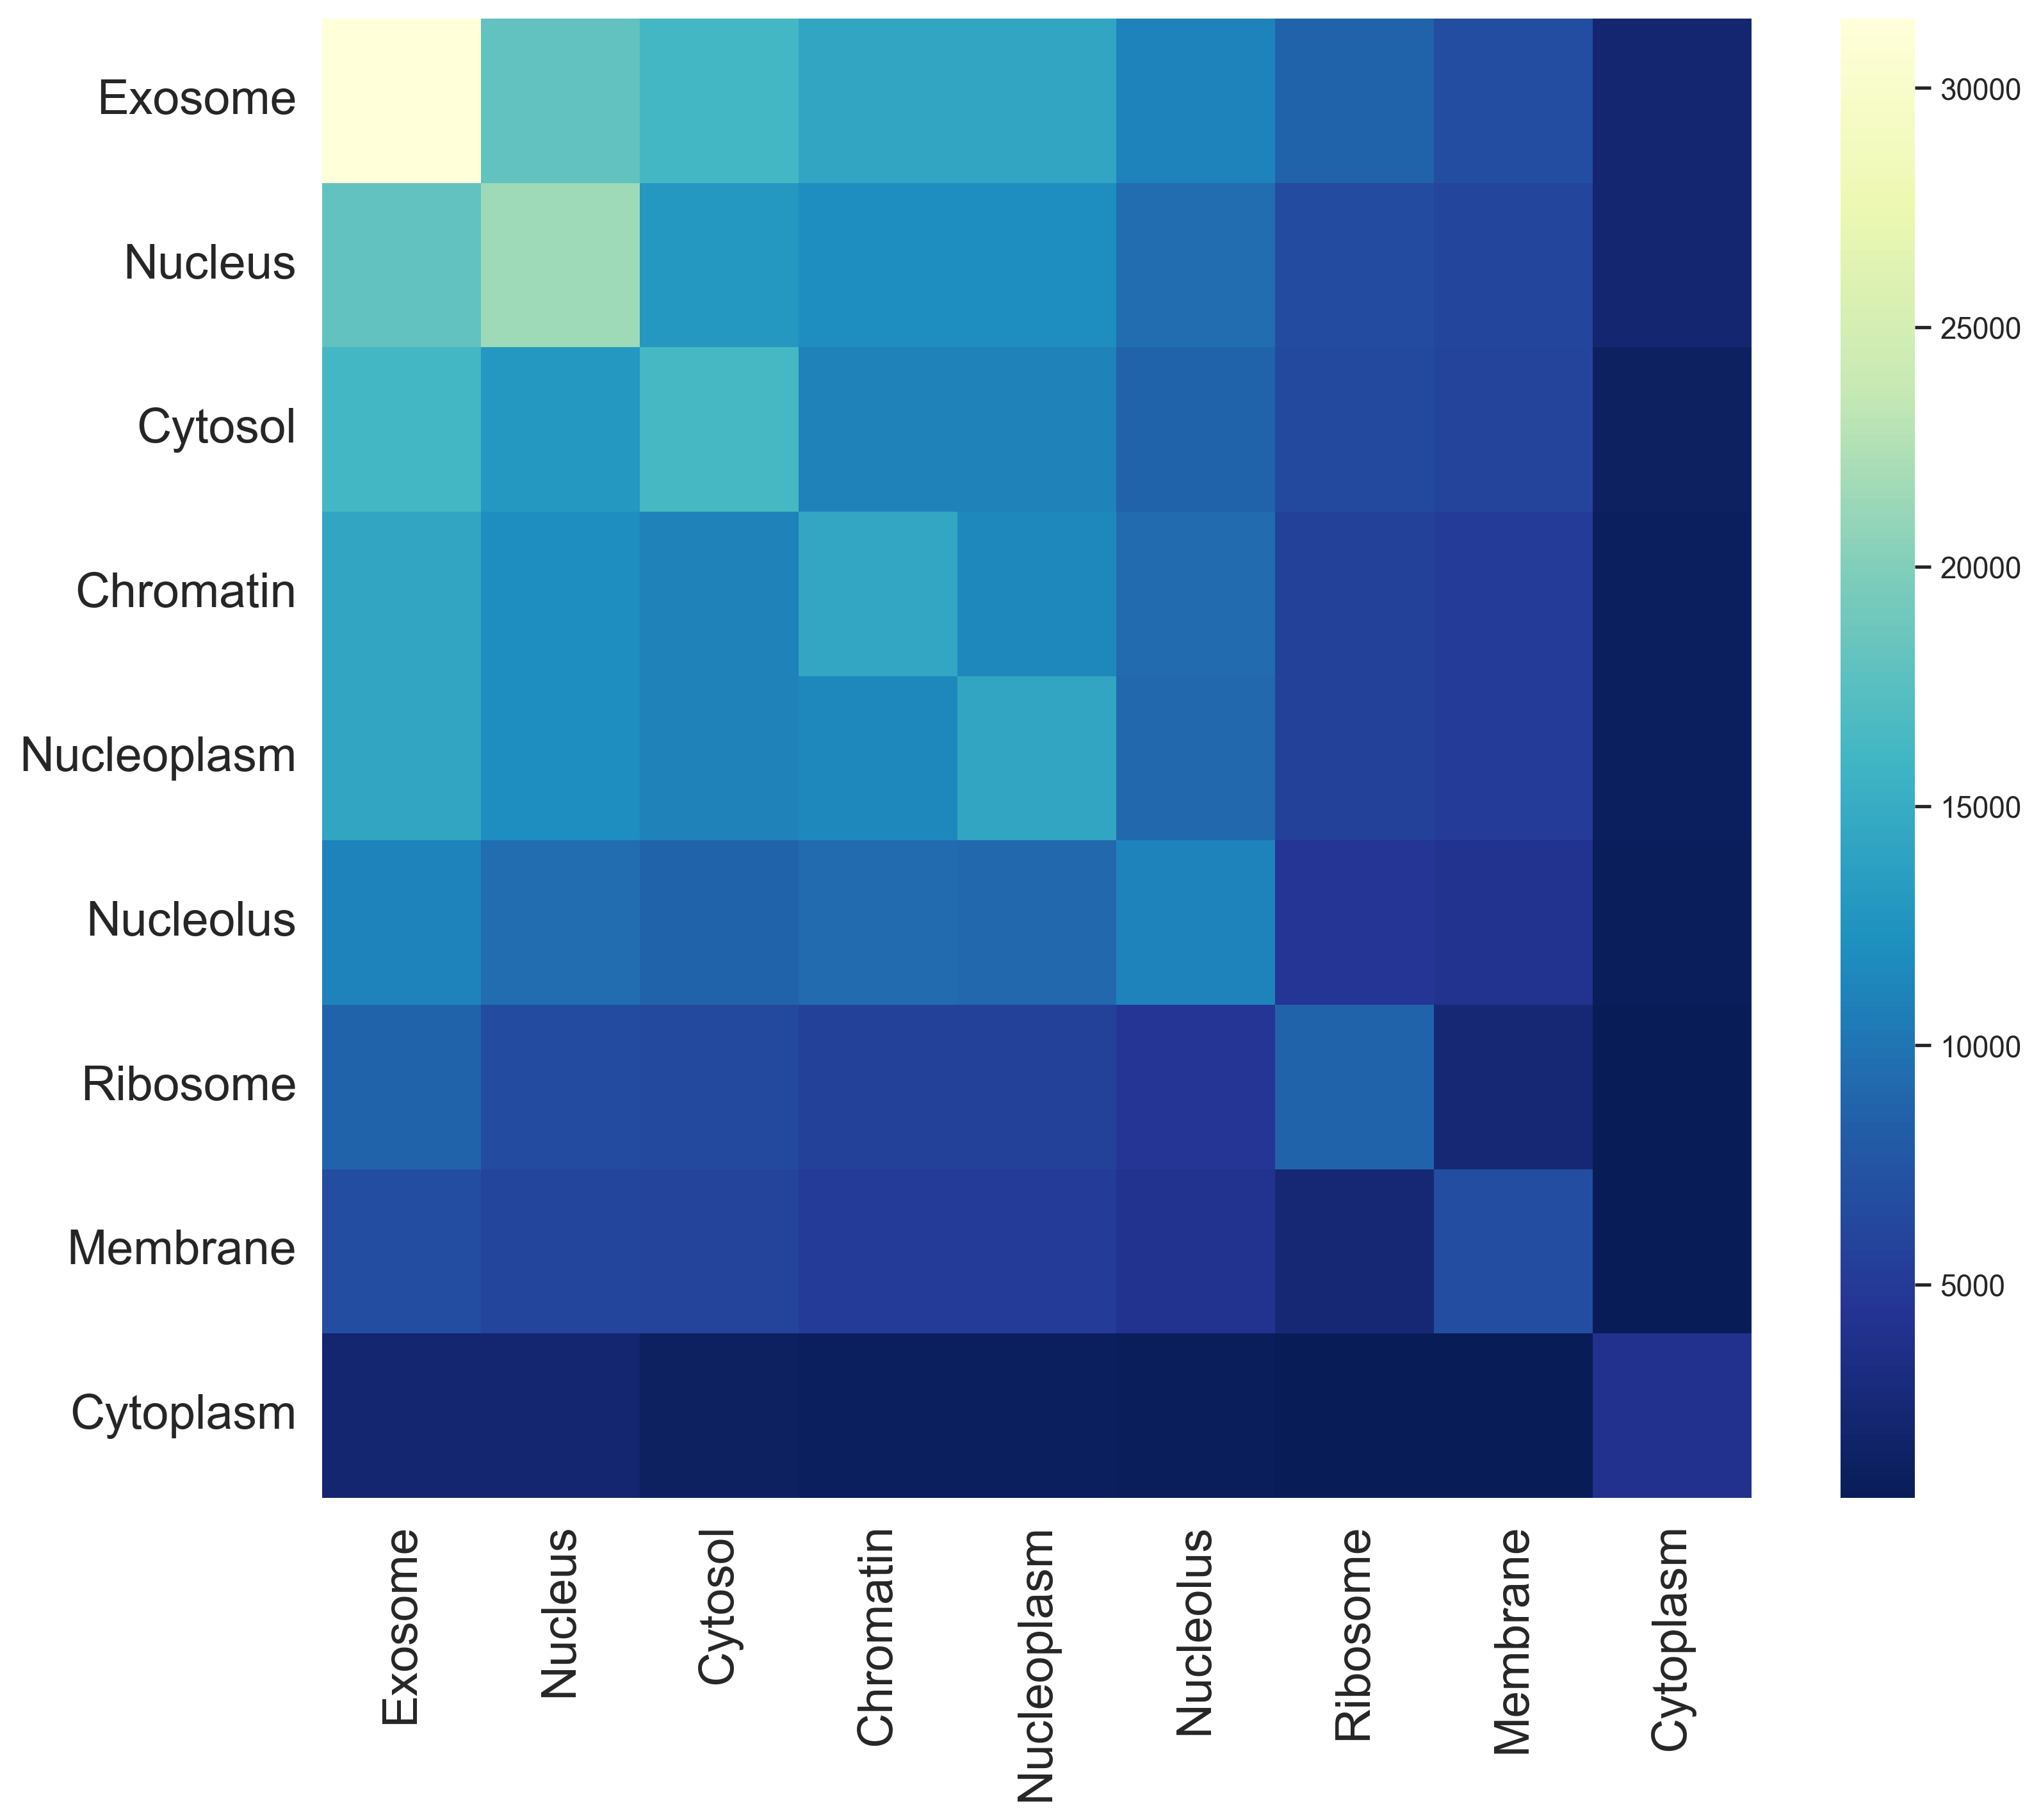

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
from itertools import combinations


file1 = '../dataset/training_validation_annotation.txt'
file2 = '../dataset/independent_annotation.txt'

# Function to read file content and return it as a list of lines
def read_file(file):
    with open(file, 'r') as f:
        return f.readlines()

# Read content from both files
data1 = read_file(file1)
data2 = read_file(file2)

# Merge content from both files
data = data1 + data2

# Initialize dictionaries to count occurrences
location_count = defaultdict(int)
pair_count = defaultdict(int)

# Process each line in the data
for line in data:
    locations = line.strip().split('|')
    # Count occurrences of each individual location
    for location in locations:
        location_count[location] += 1
    # Count occurrences of each pair of locations
    for pair in combinations(locations, 2):
        pair_count[tuple(sorted(pair))] += 1

# Find all unique locations and sort by occurrence count
sorted_locations = sorted(location_count.keys(), key=lambda x: location_count[x], reverse=True)
n = len(sorted_locations)

# Create a matrix to store heatmap data
heatmap_data = np.zeros((n, n))

# Create a dictionary for location indices
location_index = {location: idx for idx, location in enumerate(sorted_locations)}

# Fill the heatmap matrix with data
for loc1 in sorted_locations:
    for loc2 in sorted_locations:
        idx1, idx2 = location_index[loc1], location_index[loc2]
        if loc1 == loc2:
            heatmap_data[idx1, idx2] = location_count[loc1]
        else:
            pair = tuple(sorted((loc1, loc2)))
            heatmap_data[idx1, idx2] = pair_count[pair]

# Set plot style
plt.figure(figsize=(12, 10), dpi=300)  # Set higher DPI for high-resolution image
sns.set(style="whitegrid")

# Plot heatmap, using reversed color map so lighter colors indicate higher counts
ax = sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu_r", xticklabels=sorted_locations, yticklabels=sorted_locations)

# Adjust axis tick labels' font size and orientation
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=18)

# Save the plot as an image file
plt.savefig("../dataset/heatmap.png", bbox_inches='tight', pad_inches=0.1)
plt.show()
